In [24]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import torch.nn as nn
from PIL import Image 
from torchvision.utils import save_image
import os

%matplotlib inline
plt.style.use("ggplot")


class CFG:
  batch_size = 128
  num_epochs = 300
  workers = 4
  seed = 2021
  image_size = 64
  download = True
  dataroot = "data"
  nc = 3 ## number chanels
  ngf = 64 #Size of feature maps in generator
  nz = 100 #latent random input vector
  ndf = 64 #Size of feature maps in discriminator
  lr = 0.0002
  device = 'cpu'
  sample_dir = "./images/"

if not os.path.exists(CFG.sample_dir):
  os.makedirs(CFG.sample_dir)
dataset = torchvision.datasets.CIFAR10(root=CFG.dataroot, download=CFG.download,
                               transform=transforms.Compose([
                                  transforms.Resize([CFG.image_size, CFG.image_size]),
                                   transforms.ToTensor(),
                                   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                               ]))


Files already downloaded and verified


In [25]:
dataset[0][0].shape

torch.Size([3, 64, 64])

Label:  6


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-0.8745098 , -0.8112418 , -0.74797386, -0.68470585, -0.6214379 ,
        -0.5581699 , -0.49490196, -0.43163398, -0.36836597, -0.305098  ,
        -0.24183004, -0.17856206, -0.11529408, -0.0520261 ,  0.01124188,
         0.07450986], dtype=float32),
 <a list of 300 BarContainer objects>)

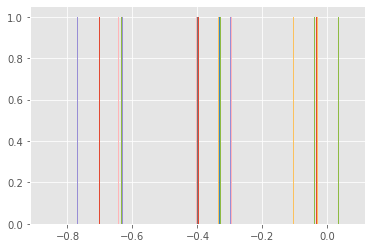

In [26]:
img, label = dataset[0]
print('Label: ', label)
plt.hist(img[:,5:15,5:15].flatten(), bins=15)

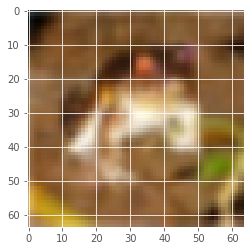

In [28]:
# unnormalization image from range (-1)-0 to range 0-1 to display it
def unnomalization(img):
  

In [ ]:
# Create the dataloader


## GAN 
состоит из двух глубоких сетей, генератора и дискриминатора. генератор создает изображения, прежде чем научиться его обучать. Поскольку дискриминатор представляет собой модель бинарной классификации, мы можем использовать функцию потери бинарной кросс-энтропии для количественной оценки того, насколько хорошо он может различать реальные и сгенерированные изображения.

In [48]:
import torch.nn as nn
import torch.nn.functional as F
class Generator(nn.Module):
    def __init__(self, nc, nz, ngf):
        #ConvTranspose2d - BatchNorm - Relu -ConvTranspose2d - BatchNorm - Relu -ConvTranspose2d - BatchNorm - Relu 
        #ConvTranspose2d - BatchNorm - Relu - ConvTranspose2d - Tanh
        super(Generator, self).__init__()
        ##
    def forward(self, x):
        ##
        return F.tanh(x)


class Discriminator(nn.Module):
    def __init__(self, nc, ndf):
    #conv2d - leaky - conv2d - batchnorm - leaky - conv2d - batchnorm - leaky - conv - batchnorm - leaky - conv2d
        super(Discriminator, self).__init__()
        ##
    def forward(self, x):
       ##
        return F.sigmoid(x)


In [49]:
# create new Generator model

# create new Discriminator model

In [50]:

# show the output of model 
y = G(torch.randn(2, latent_size))

In [52]:
# define the criterion is nn.BCELoss()
criterion = nn.BCELoss()
## Define the optimizer for generator and discrimator


In [53]:

def reset_grad():
    ## reset gradient for optimizer of generator and discrimator

def train_discriminator(images):
  
    # Create the labels which are later used as input for the BCE loss
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)
        
    
    outputs = D(images)
    # Loss for real images
    
    real_score = outputs

    # Loss for fake images
    z = torch.randn(batch_size, latent_size).to(device)
    fake_images = G(z)
    outputs = D(fake_images)

    fake_score = outputs

    # Sum losses

    # Reset gradients

    # Compute gradients

    # Adjust the parameters using backprop
    
    return d_loss, real_score, fake_score

In [54]:
def train_generator():
    # Generate fake images and calculate loss
    # z = torch.randn(batch_size, latent_size).to(device)
    z = torch.Tensor(np.random.normal(0, 1, (batch_size, latent_size))).to(device)
    fake_images = G(z)
    labels = torch.ones(batch_size, 1).to(device)
    # calculate the generator loss

    
    # Reset gradients
    
    # Backprop and optimize

    return g_loss, fake_images

## Start the training proccess

In [55]:
def save_fake_images(index):
    sample_vectors = torch.randn(CFG.batch_size, CFG.nz , 1 , 1).to(CFG.device)
    fake_images = G(sample_vectors)
    fake_images = fake_images.reshape(fake_images.size(0), 3, 64, 64)
    fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
    print('Saving', fake_fname)
    save_image(unnomalization(fake_images), os.path.join(CFG.sample_dir, fake_fname), nrow=10)

In [56]:

%%time
total_step = len(data_loader)
d_losses, g_losses, real_scores, fake_scores = [], [], [], []
G.to(device)
D.to(device)
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(data_loader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator  

        # Train the generator
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
    # Sample and save images
    save_fake_images(epoch+1)

Epoch [0/300], Step [50/391], d_loss: 0.0179, g_loss: 11.7445, D(x): 0.99, D(G(z)): 0.01
Epoch [0/300], Step [100/391], d_loss: 0.0129, g_loss: 9.1232, D(x): 0.99, D(G(z)): 0.01


KeyboardInterrupt: 

In [ ]:
Image(os.path.join(sample_dir, 'fake_images-0225.png'))

In [ ]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

In [ ]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

In [ ]:
if not os.path.exists("./checkpoint/"):
    os.makedirs("./checkpoint/")
torch.save(
    self.G.state_dict(),
    "checkpoint/generator_model.pth")
torch.save(
    self.D.state_dict(),
    "checkpoint/discrimator_model.pth")